$$ 
\begin{aligned}
&\frac{1}{r^2} \frac{d}{dr} r^2 \frac{d}{dr} f(r) \\
= &\frac{1}{r^2} \frac{d}{dr} r^2 \frac{df}{dr} \\
= &\frac{1}{r^2} \left( 2 r  \frac{df}{dr} +    r^2 \frac{d^2f}{dr^2}    \right) \\
= &\frac{2}{r}  \frac{df}{dr} + \frac{d^2f}{dr^2}
\end{aligned}
$$
$$
\begin{aligned}
&\frac{1}{r} \frac{d^2}{dr^2} r f(r) \\
= &\frac{1}{r} \frac{d}{dr} \left( f +  r \frac{df}{dr}    \right) \\
= &\frac{1}{r} \left( 2 \frac{df}{dr} +  r \frac{d^2f}{dr^2}   \right) \\
= &\frac{2}{r} \frac{df}{dr} + \frac{d^2f}{dr^2}
\end{aligned}
$$

$$
-\frac{1}{2} \frac{1}{r} \frac{d^2}{dr^2} r \psi(r) + \frac{1}{2 r^2} l (l+1) \psi(r) - \frac{Z}{r} \psi(r) = E \psi(r)
$$
$$
 \phi(r) = r \psi(r)
 $$
 $$
-\frac{1}{2} \frac{d^2}{dr^2} \phi(r) + \frac{1}{2 r^2} l (l+1) \phi(r) - \frac{Z}{r} \phi(r) = E \phi(r)
$$
$$
-\frac{1}{2} \frac{d^2}{dr^2} \phi(r) - \frac{Z}{r} \phi(r) = E \phi(r)
$$
$$
 r \in [0,\infty]
$$
$$
  \psi_{0} (r) = \exp(-Z r)
  $$
$$
 \psi(r) = 10^{-10} \implies r > \log(10^{-10}) / Z \approx 2.3 \times 10 / Z 
 $$

### Fix proposed by Dr. Harrison
But I believe the problem to be that we are not enforcing the boundary condition $\phi(0)=0$.  We are assuming this in how we compute the kinetic energy and it is physically very important—the wave function ($\psi$) should be finite at the origin and hence $\phi=r\psi$ must be zero.  This is because the potential is infinite at the origin.

The behaviour is different to the harmonic oscillator, since there we were solving in a box $[-L,L]$ and the potential $x^2 / 2$ is large and positive at the ends of this range. Thus the wavefunction will be small since the particle in its ground state naturally avoids the high energy regions.  However, for the H-atom, we are using $[0,L]$ as the box and at zero the potential is large and negative—the particle wants to be there! I suspect we can get away with not enforcing the boundary condition that $\psi(L)=0$ since the potential is large there, relative to near the origin.  However, I've been wrong before!!

Thus, the fix is easy. We drop the constant basis function $P(x,0)=1$ and subtract a multiple of it from the other polynomials.  

Thus, our basis functions $b_i(x)$ become

$$
b_i(x) = P(x,i+1) - (-1)^i   \quad \text{for }i=0,1,2,...
$$

The following I have not thought thru much, but I think is correct

Since $\langle P(i) | P(0) \rangle = 0$ for $i>0$ (noting $P(x,0)=1$) I think the basis is still orthonormal, though the diagonal elements will change (add one to them all, I think).

Since $\frac{d}{dx} P(x,0)$ is zero, the kinetic energy matrix should be unchanged.

The potential energy matrix will change.


In [1635]:
# setting up everything we need for the matrices
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.special import roots_legendre, eval_legendre
import math

Z = 1
qn_l = 1 # quantum number l
L = math.log(10) * 10 / Z

n = 50
epsilon = 1e-6
roots, weights = roots_legendre(n)

P = np.array([eval_legendre(i, roots) for i in range(n+1)])

dP = np.zeros((n+1, n))
dP[1] = np.ones(n)
for i in range(2,n+1):
    dP[i] = (2*i-1) * P[i-1] + dP[i-2]

In [1636]:
# new basis
b = lambda i: P[i+1] - (-1)**(i+1)
db = lambda i: dP[i+1]

The size of the matrices will now be one less in each dimension, because we have one less Legendre polynomial. 

In [1637]:
overlap_matrix = np.zeros((n-1,n-1))
for l in range(n-1):
    for m in range(n-1):
        approx_overlap = np.dot(b(l) * b(m), weights) * L * 0.5
        if abs(approx_overlap) < epsilon:
            approx_overlap = 0
        overlap_matrix[l, m] = approx_overlap
print(overlap_matrix)
# same as original overlap, except without the first row and column

[[ 30.70113457 -23.02585093  23.02585093 ...  23.02585093 -23.02585093
   23.02585093]
 [-23.02585093  27.63102112 -23.02585093 ... -23.02585093  23.02585093
  -23.02585093]
 [ 23.02585093 -23.02585093  26.31525821 ...  23.02585093 -23.02585093
   23.02585093]
 ...
 [ 23.02585093 -23.02585093  23.02585093 ...  23.26822831 -23.02585093
   23.02585093]
 [-23.02585093  23.02585093 -23.02585093 ... -23.02585093  23.26323084
  -23.02585093]
 [ 23.02585093 -23.02585093  23.02585093 ...  23.02585093 -23.02585093
   23.25843528]]


PE: 
$$
\int_{-1}^{1} P_l \frac{-Z}{\frac{L}{2}(y + 1)} P_m \frac{L}{2} dy \
= \int_{-1}^{1} P_l \frac{-Z}{y + 1} P_m dy
$$

In [1638]:
pe_matrix = np.zeros((n-1, n-1))
for l in range(n-1):
    for m in range(n-1):
        approx_pe = np.dot(b(l) * b(m) / (roots + 1), weights) * -Z
        if abs(approx_pe) < epsilon:
            approx_pe = 0
        pe_matrix[l, m] = approx_pe
print(pe_matrix)

[[-2.          2.         -2.         ... -2.          2.
  -2.        ]
 [ 2.         -3.          3.         ...  3.         -3.
   3.        ]
 [-2.          3.         -3.66666667 ... -3.66666667  3.66666667
  -3.66666667]
 ...
 [-2.          3.         -3.66666667 ... -8.87592768  8.87592768
  -8.87592768]
 [ 2.         -3.          3.66666667 ...  8.87592768 -8.91759435
   8.91759435]
 [-2.          3.         -3.66666667 ... -8.87592768  8.91759435
  -8.95841068]]


In [1639]:
ke_matrix = np.zeros((n-1, n-1))
for l in range(n-1):
    for m in range(n-1):
        approx_ke = np.dot(db(l) * db(m), weights) / L
        if abs(approx_ke) < epsilon:
            approx_ke = 0
        ke_matrix[l, m] = approx_ke
print(ke_matrix)

[[8.68588964e-02 0.00000000e+00 8.68588964e-02 ... 8.68588964e-02
  0.00000000e+00 8.68588964e-02]
 [0.00000000e+00 2.60576689e-01 0.00000000e+00 ... 0.00000000e+00
  2.60576689e-01 0.00000000e+00]
 [8.68588964e-02 0.00000000e+00 5.21153378e-01 ... 5.21153378e-01
  0.00000000e+00 5.21153378e-01]
 ...
 [8.68588964e-02 0.00000000e+00 5.21153378e-01 ... 9.79768351e+01
  0.00000000e+00 9.79768351e+01]
 [0.00000000e+00 2.60576689e-01 0.00000000e+00 ... 0.00000000e+00
  1.02146062e+02 0.00000000e+00]
 [8.68588964e-02 0.00000000e+00 5.21153378e-01 ... 9.79768351e+01
  0.00000000e+00 1.06402148e+02]]


In [1640]:
angular_ke_matrix = np.zeros((n-1, n-1))
for l in range(n-1):
    for m in range(n-1):
        approx = np.dot(P[l] * P[m] / (1 + roots)**2, weights) * qn_l * (qn_l + 1) / L
        if abs(approx) < epsilon:
            approx = 0
        angular_ke_matrix[l, m] = approx
print(angular_ke_matrix)

[[ 221.49018577 -220.70859375  219.4059864  ...   18.2052672
   -13.53601951    8.94299197]
 [-220.70859375  220.10071952 -218.88497107 ...  -18.19093234
    13.52538077   -8.93597235]
 [ 219.4059864  -218.88497107  217.8429404  ...   18.16226262
   -13.50410329    8.92193312]
 ...
 [  18.2052672   -18.19093234   18.16226262 ...    2.70928261
    -2.03554415    1.35478607]
 [ -13.53601951   13.52538077  -13.50410329 ...   -2.03554415
     1.53552348   -1.02486407]
 [   8.94299197   -8.93597235    8.92193312 ...    1.35478607
    -1.02486407    0.68792246]]


In [1641]:
#obtaining exact coefficients
phi = lambda r: r * (math.e)**(-Z * r)

c = np.zeros(n-1)
for l in range(n-1):
    c[l] = (2*l +3) * 0.5 * np.dot(phi(L * 0.5 * (roots + 1)) * P[l+1], weights)
print(c)

# return basis function evaluations
def basis_eval(n, x):
    res = np.zeros(n)
    for i in range(n):
        res[i] = eval_legendre(i+1, 2/L * x -1) - (-1)**(i+1)
    return res

fit = lambda x : np.dot(basis_eval(n-1, x), c)
fit(6),phi(6)

[-1.07654941e-01  1.18724566e-01 -7.83959027e-02  1.40633078e-02
  4.26417611e-02 -7.35007348e-02  7.76013945e-02 -6.45539199e-02
  4.55903067e-02 -2.83051658e-02  1.57664128e-02 -7.98647935e-03
  3.71540711e-03 -1.59949154e-03  6.41112296e-04 -2.40471634e-04
  8.47696630e-05 -2.81890099e-05  8.87152698e-06 -2.65003480e-06
  7.53290279e-07 -2.04240932e-07  5.29310855e-08 -1.31372245e-08
  3.12815551e-09 -7.15764019e-10  1.57613336e-10 -3.34441802e-11
  6.84378063e-12 -1.34891477e-12  2.53616855e-13 -4.35231576e-14
  5.66588983e-15 -2.98743443e-16  8.55171753e-16 -2.22500604e-15
  3.38975605e-15 -3.92760978e-15  3.64052199e-15 -2.66362646e-15
  1.01747111e-15  1.03481114e-15 -2.96192342e-15  4.48003041e-15
 -5.10866900e-15  4.67789309e-15 -3.17399505e-15  9.32396113e-16
  1.51111486e-15]


(0.01487251306000727, 0.014872513059998156)

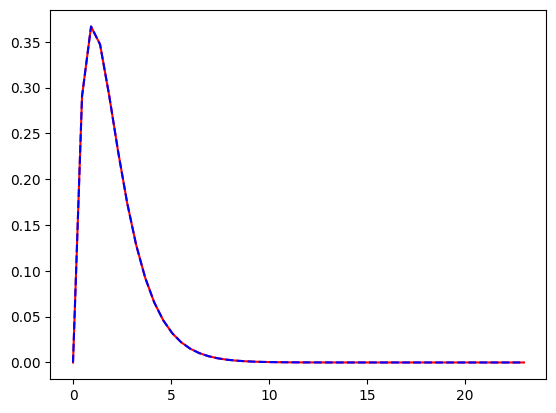

In [1642]:
# phi(X) plotted with fit, showing very small error
X = np.linspace(start=0,stop=L,num=51)
F = [fit(x) for x in X]
plt.plot(X,F,"r",X,phi(X),"b--")

In [1643]:
# numerical overlap computation
overlap_estimate = np.dot(c, np.dot(overlap_matrix, c))
ke_integral = np.dot(c, np.dot(ke_matrix, c))
angular_ke_integral = np.dot(c, np.dot(angular_ke_matrix, c))
pe_integral = np.dot(c, np.dot(pe_matrix, c))

ke_approx = ke_integral / overlap_estimate
pe_approx = pe_integral / overlap_estimate
angular_ke_approx = angular_ke_integral / overlap_estimate

energy_approx = ke_approx + angular_ke_approx + pe_approx
print(overlap_estimate, ke_integral, angular_ke_integral, pe_integral)
print(ke_approx, angular_ke_approx, pe_approx, energy_approx)

0.25000000000002165 0.12499999999999259 0.4673876001581004 -0.25000000000002964
0.49999999999992706 1.8695504006322397 -1.000000000000032 1.3695504006321348


In [1644]:
def energy(c):
    overlap_integral = np.dot(c, np.dot(overlap_matrix, c))
    ke_integral = np.dot(c, np.dot(ke_matrix, c))
    pe_integral = np.dot(c, np.dot(pe_matrix, c))
#    angular_ke_integral = np.dot(c, np.dot(angular_ke_matrix, c))
    return (ke_integral + pe_integral) / overlap_integral

In [1645]:
def gradient(c):
    h_matrix = ke_matrix + pe_matrix # + angular_ke_matrix
    integral = np.dot(h_matrix - energy(c) * overlap_matrix, c)
    overlap_integral = np.dot(c, np.dot(overlap_matrix, c))
#    print(energy(c) * overlap_matrix, overlap_integral, integral, h_matrix)
    return 2 * integral / overlap_integral

In [1646]:
# this finds all eigenstates possible... first one is ground state
scipy.linalg.eigh(ke_matrix + pe_matrix, overlap_matrix, eigvals_only=True)

array([-5.00000000e-01, -1.25001216e-01, -5.73745388e-02, -2.86094021e-02,
        2.79141797e-02,  1.08999965e-01,  2.11426098e-01,  3.34188580e-01,
        4.76762296e-01,  6.38827128e-01,  8.20172869e-01,  1.02065480e+00,
        1.24016966e+00,  1.47864163e+00,  1.73601360e+00,  2.01224160e+00,
        2.30729114e+00,  2.62113469e+00,  2.95374995e+00,  3.30511860e+00,
        3.67522539e+00,  4.06405754e+00,  4.47160418e+00,  4.89785601e+00,
        5.34280591e+00,  5.80644715e+00,  6.28888761e+00,  6.79007806e+00,
        7.31464162e+00,  7.85827720e+00,  8.47908972e+00,  9.10077003e+00,
        1.00030922e+01,  1.07885476e+01,  1.22366963e+01,  1.33222068e+01,
        1.56691247e+01,  1.73226003e+01,  2.12181017e+01,  2.40600416e+01,
        3.09293649e+01,  3.65929357e+01,  5.01665427e+01,  6.38937592e+01,
        9.69585037e+01,  1.42541256e+02,  2.66835178e+02,  5.72185080e+02,
        2.39025056e+03])

In [1647]:
gradient(c)

array([-1.76198685e-08, -9.48235876e-13, -1.76195823e-08, -1.16883328e-12,
       -1.76194965e-08, -1.08580518e-12, -1.76197066e-08, -7.90670987e-13,
       -1.76200211e-08, -4.36512658e-13, -1.76203625e-08, -5.79326486e-14,
       -1.76207409e-08,  3.83526134e-13, -1.76211943e-08,  9.02236678e-13,
       -1.76217175e-08,  1.51296024e-12, -1.76223727e-08,  2.30680863e-12,
       -1.76232413e-08,  3.33179640e-12, -1.76243357e-08,  4.56664666e-12,
       -1.76255998e-08,  5.91235764e-12, -1.76268891e-08,  7.20375168e-12,
       -1.76280305e-08,  8.28541628e-12, -1.76289150e-08,  9.08453599e-12,
       -1.76295268e-08,  9.66729254e-12, -1.76299809e-08,  1.01615940e-11,
       -1.76304256e-08,  1.07401997e-11, -1.76310197e-08,  1.15021489e-11,
       -1.76317790e-08,  1.23932690e-11, -1.76325906e-08,  1.32123931e-11,
       -1.76332016e-08,  1.37530244e-11, -1.76334670e-08,  1.39436686e-11,
       -1.76334639e-08])

In [1648]:
np.random.seed(2023)
c0 = np.random.random(n-1)
result = scipy.optimize.minimize(energy, c0, jac=gradient, method="CG")
print(result)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -0.49999974399851865
       x: [ 1.742e+01 -1.921e+01 ... -1.749e-07  1.580e-04]
     nit: 153
     jac: [ 1.083e-06 -1.728e-06 ... -5.227e-06  4.009e-06]
    nfev: 479
    njev: 479


In [1649]:
def conjugate_gradient(function, gradient, c0):
    p = 1
    epsilon = 1e-3 # threshold for error
    position = c0
    r = -gradient(position)
    d = r
    old_r = r

    # calculating step size
    def diff(f, x, h=1e-3):
        return (f(x+h) - f(x-h)) / (2*h)
    
    def diff_2nd(f, x, h=1e-3):
        return (diff(f, x+h) - diff(f, x-h)) / (2*h)
    
    while np.linalg.norm(r) > epsilon:
        line_function = lambda s: function(position + s * d)
        diff_line_function = diff(line_function, 0)
        diff_2nd_line_function = diff_2nd(line_function, 0)
        step_size = - diff_line_function / diff_2nd_line_function

        position += step_size * d
        old_r = r
        r = -gradient(position)
        beta = np.dot(r, r - old_r)/np.dot(old_r, old_r)
        d = r + beta * d
#        print(p, function(position), np.linalg.norm(r), step_size, diff_line_function, diff_2nd_line_function)
        p += 1
        
    return position, function(position), gradient(position)

'''
np.random.seed(2023)
c0 = np.random.random(n)
conjugate_gradient(energy, gradient, c0)
'''

'\nnp.random.seed(2023)\nc0 = np.random.random(n)\nconjugate_gradient(energy, gradient, c0)\n'

In [1650]:
cc = result.x

overlap_estimate = np.dot(cc, np.dot(overlap_matrix, cc))
ke_integral = np.dot(cc, np.dot(ke_matrix, cc))
angular_ke_integral = np.dot(cc, np.dot(angular_ke_matrix, cc))
pe_integral = np.dot(cc, np.dot(pe_matrix, cc))

ke_approx = ke_integral / overlap_estimate
pe_approx = pe_integral / overlap_estimate
angular_ke_approx = angular_ke_integral / overlap_estimate

energy_approx = ke_approx + angular_ke_approx + pe_approx
print(overlap_estimate, ke_integral, angular_ke_integral, pe_integral)
print(ke_approx, angular_ke_approx, pe_approx, energy_approx)

6545.332937412755 3270.507757629286 12234.95138468227 -6543.172550720736
0.4996701907912503 1.8692634128277839 -0.999669934789769 1.369263668829265


In [1651]:
# integrated function that does all the calculations together
def setup(n, Z=1, epsilon=1e-6):
    
    L = math.log(10) * 10 / Z

    qn_l = 1

    roots, weights = roots_legendre(n)

    P = np.array([eval_legendre(i, roots) for i in range(n+1)])

    dP = np.zeros((n+1, n))
    dP[1] = np.ones(n)
    for i in range(2,n+1):
        dP[i] = (2*i-1) * P[i-1] + dP[i-2]

    # new basis
    b = lambda i: P[i+1] - (-1)**(i+1)
    db = lambda i: dP[i+1]
    
    overlap_matrix = np.zeros((n-1,n-1))
    for l in range(n-1):
        for m in range(n-1):
            approx_overlap = np.dot(b(l) * b(m), weights) * L * 0.5
            if abs(approx_overlap) < epsilon:
                approx_overlap = 0
            overlap_matrix[l, m] = approx_overlap
    # same as original overlap, except without the first row and column

    pe_matrix = np.zeros((n-1, n-1))
    for l in range(n-1):
        for m in range(n-1):
            approx_pe = np.dot(b(l) * b(m) / (roots + 1), weights) * -Z
            if abs(approx_pe) < epsilon:
                approx_pe = 0
            pe_matrix[l, m] = approx_pe

    ke_matrix = np.zeros((n-1, n-1))
    for l in range(n-1):
        for m in range(n-1):
            approx_ke = np.dot(db(l) * db(m), weights) / L + np.dot(b(l) * b(m) / (roots + 1)**2, weights) * qn_l * (qn_l + 1) / L
            if abs(approx_ke) < epsilon:
                approx_ke = 0
            ke_matrix[l, m] = approx_ke
        
    #obtaining exact coefficients
    phi = lambda r: r**2 * (math.e)**(-Z * r * 0.5) # for excited state
    # phi = lambda r: r * (math.e)**(-Z * r) # for ground state

    c_exact = np.zeros(n-1)
    for l in range(n-1):
        c_exact[l] = (2*l +3) * 0.5 * np.dot(phi(L * 0.5 * (roots + 1)) * P[l+1], weights)
    
    def energy(c):
        overlap_integral = np.dot(c, np.dot(overlap_matrix, c))
        ke_integral = np.dot(c, np.dot(ke_matrix, c))
        pe_integral = np.dot(c, np.dot(pe_matrix, c))
        return (ke_integral + pe_integral) / overlap_integral

    def gradient(c):
        h_matrix = ke_matrix + pe_matrix
        integral = np.dot(h_matrix - energy(c) * overlap_matrix, c)
        overlap_integral = np.dot(c, np.dot(overlap_matrix, c))
        return 2 * integral / overlap_integral

    np.random.seed(1000)
    c0 = np.random.random(n-1)
    result = scipy.optimize.minimize(energy, c0, jac=gradient, method="CG")

    return energy(c_exact), result.fun

In [1652]:
setup(50)

(-0.12500024194716192, -0.12500009811030935)

In [1653]:
def phi_approx(x, c):
    n = np.size(c) # order of quadrature and basis size
    return np.dot(eval_legendre(range(n), x), c)

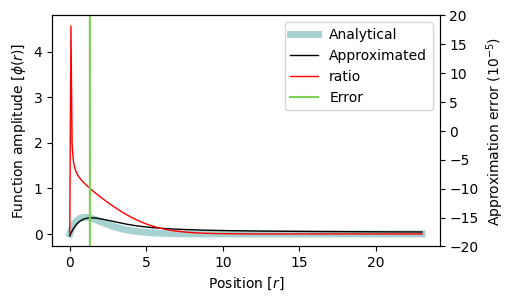

In [1654]:
X = np.linspace(0,L,300)
y = [phi_approx(2*i/L-1, result.x) for i in X] / (L * phi_approx(1, result.x))
y2 = [phi(i) for i in X]
ratio = y2 / y

fig, ax1 = plt.subplots(figsize=(5, 3))

ax2 = ax1.twinx()

ax2.set_ylim(-20, 20)

ax1.set_xlabel(r'Position [$r$]')
ax1.set_ylabel(r'Function amplitude [$\phi(r)$]')
ax2.set_ylabel(r'Approximation error ($10^{-5}$)')

colors = plt.cm.viridis([.5, .8])

p1 = ax1.plot(X, y2, color=colors[0], ls='-', alpha=0.4, lw=5, label='Analytical')
p2 = ax1.plot(X, y, color='k', ls='-', lw=1, label='Approximated')
p2b = ax1.plot(X, ratio, color='r', ls='-', lw=1, label='ratio')
p3 = ax2.plot(X, (y2 - y) * 100000, color=colors[1], ls='-', label='Error')

ax1.legend(handles=p1+p2+p2b+p3, loc='best')

# plt.savefig('fig1.png', bbox_inches='tight', dpi=300)

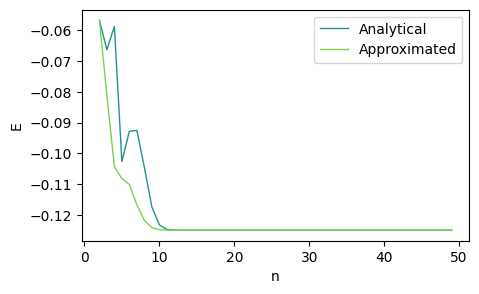

In [1655]:
X = []
e_exact = []
e_approx = []

for i in range(2,50,1):
    exact, approx = setup(i)
    X.append(i)
    e_exact.append(exact)
    e_approx.append(approx)


fig, ax1 = plt.subplots(figsize=(5, 3))
ax1.set_xlabel(r'n')
ax1.set_ylabel(r'E')

colors = plt.cm.viridis([.5, .8])

p1 = ax1.plot(X, e_exact, color=colors[0], ls='-', lw=1, label='Analytical')
p2 = ax1.plot(X, e_approx, color=colors[1], ls='-', lw=1, label='Approximated')

ax1.legend(handles=p1+p2, loc='best')

plt.savefig('fig/hatom-fix.png', bbox_inches='tight', dpi=300)